<a href="https://colab.research.google.com/github/junjunmeng/Airbnb/blob/main/Udacity_Project1_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seattle Airbnb 
 ## Dataset: https://www.kaggle.com/airbnb/seattle
  ## Inspiration: http://insideairbnb.com/seattle/

 ## Business questions:
  - Can you describe the vibe of each Seattle neighborhood using listing descriptions?
  - What are the busiest times of the year to visit Seattle? By how much do prices spike?
  - How is the weekend effect? Compared to seasonal effect,which drive a bigger price spike? 


In [1]:
from google.colab import drive
drive.mount('/content/drive')
# set working directory

import os
os.chdir('/content/drive/MyDrive/U-udacity/Project1')


Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


In [4]:
calendar = pd.read_csv('calendar.csv')
# print(calendar.shape)
# print(calendar.columns)
# calendar.head()

listing = pd.read_csv('listings.csv')
# print(listing.shape)
# print(listing.columns)
# # listing.head()

review = pd.read_csv('reviews.csv')
# print(review.shape)
# print(review.columns)
# # review.head()



### <font color = 'blue'>1. Describe the vibe of each Seattle neighborhood using listing descriptions?

---


In [5]:
# convert currency to number  
listing['price'] = listing['price'].replace('[\$,]', '', regex = True).astype(float)
calendar['price'] = calendar['price'].replace('[\$,]', '', regex = True).astype(float)

# get year from calendar dataframe
import datetime
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['month'] = pd.DatetimeIndex(calendar['date']).month

Text(0.5, 1.0, 'Mean price by host neighborhood')

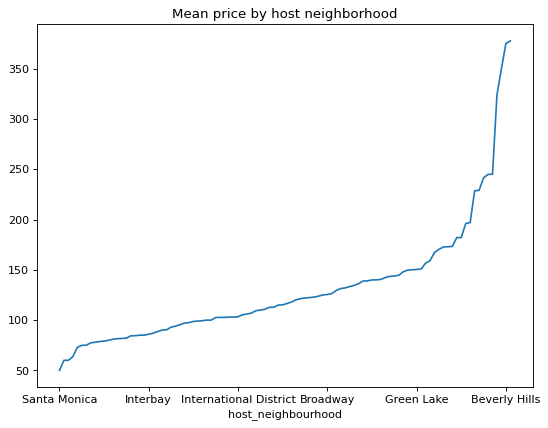

In [6]:
# the mean price of host_neighbourhood
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

meanPrice_neighbour = listing.groupby('host_neighbourhood')['price'].mean().sort_values()

meanPrice_neighbour.reset_index(name =  "mean_price")

fig = meanPrice_neighbour.plot()
plt.title("Mean price by host neighborhood")

#### Use a price per square feet to gauge the price of neighbourhood

Text(0.5, 1.0, 'Mean price per square feet by host neighborhood')

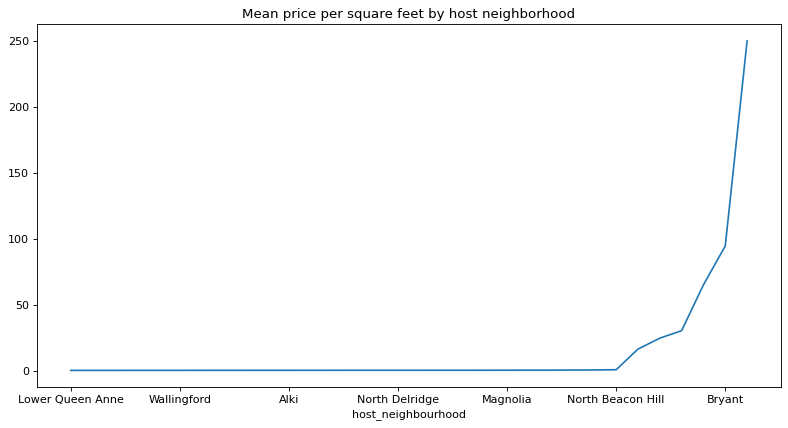

In [7]:
# price/sq 
listing['pricePerSf'] = listing['price']/listing['square_feet']
meanPrice_sqft_neighbourhood = listing.groupby('host_neighbourhood')['pricePerSf'].mean().sort_values()

figure(figsize=(12, 6), dpi=80)


fig = meanPrice_sqft_neighbourhood.plot()
plt.title("Mean price per square feet by host neighborhood")

In [8]:
# list the five most expensive neighbourhood

meanPrice_sqft_neighbourhood= meanPrice_sqft_neighbourhood.reset_index(name =  "price_sqft")
meanPrice_sqft_neighbourhood[meanPrice_sqft_neighbourhood['price_sqft'] > 0].sort_values(by = 'price_sqft', ascending = False).iloc[3:10,]
                                                                                                                                                                                                                                                                        

,host_neighbourhood,price_sqft
31,Atlantic,250.000000
30,Bryant,94.500000
29,Madrona,65.000000
28,Ballard,30.212569
27,Greenwood,24.542692
26,Crown Hill,16.261818
25,North Beacon Hill,0.625000


<font color = 'green'> Takeway to the Seattle neigbourhood: 

According to the plot and table of mean price per square feet, as shown above, the most expensive neighborhood is Atlantic, followed by Bryant and Madrona. Except for North Beacon Hill, Crown Hill, Greenwood, Ballard, Madrona, Bryant, and Atlantic, the remaining neighborhoods shared a similar and low price per square feet value. If you wanna make a reasonable deal, you probably need to void those areas, since they generally need to be paid more.

### <font color = 'blue'>What are the busiest times of the year to visit Seattle? By how much do prices spike?

In [9]:
# get the price from available = True
calendar_true = calendar[calendar.available == 't']

Text(0.5, 1.0, 'Mean price by year and month')

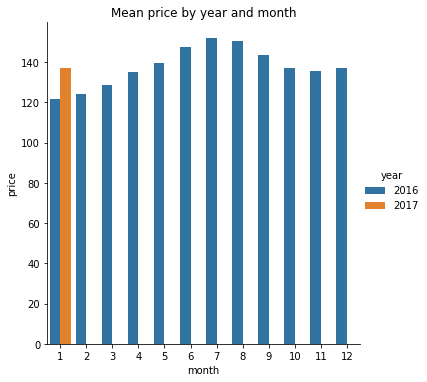

In [19]:
# get the price per year and month
price_by_year_month = calendar_true.groupby(['year', 'month'])['price'].mean().reset_index()
sns.catplot(data = price_by_year_month, kind = 'bar', hue = 'year',  x= 'month', y ='price')
plt.title("Mean price by year and month")

<font color = 'green'> Takeway for the busiest season and the price spike

According to the price spikes at Airbnb historical data, the highest prices happens in June, July, and August, July is the highest price. The price spike roughly around 20% comparing July vs the other non-summer seasons.

###<font color = 'blue'>  The effect of day of week on the price, which day in a week is the cheapest and which day is most expensive

In [ ]:
calendar_true['dayOfWeek'] = pd.DatetimeIndex(calendar_true['date']).dayofweek

def convert(dayNo):
  if dayNo == 6:
    return 'Sunday'
  if dayNo == 0:
    return 'Monday'
  if dayNo == 1:
    return 'Tuesday'
  if dayNo == 2: 
    return 'Wednesday'
  if dayNo== 3:
    return 'Thursday'
  if dayNo == 4:
    return 'Friday'
  if dayNo == 5:
    return 'Saturday'
calendar_true['DayofWeek'] = calendar_true['dayOfWeek'].apply(convert)
calendar_true = calendar_true.drop(columns = ['dayOfWeek'])

In [12]:
# convert day of week to names

from pandas.api.types import CategoricalDtype

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories = cats, ordered= True)

calendar_true['DayofWeek'] = calendar_true['DayofWeek'].astype(cat_type)

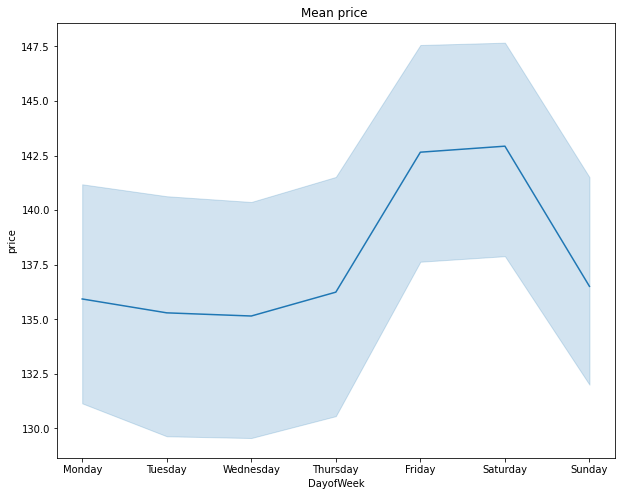

In [13]:
# get the mean price for each day of week and visualize the trend 

price_dayOfWeek= calendar_true.groupby(['month', 'DayofWeek'])['price'].mean().reset_index()
from matplotlib import pyplot
fig_dims = (10,8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data = price_dayOfWeek, x = 'DayofWeek', y = 'price', ax = ax)
plt.title("Mean price ")
plt.show()

Text(0.5, 1.0, 'price trend by month and day of week')

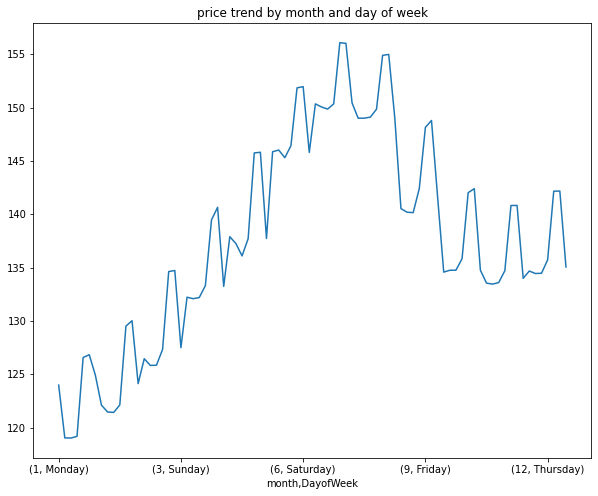

In [21]:
fig_dims = (10,8)
fig, ax = plt.subplots(figsize=fig_dims)
calendar_true.groupby(['month', 'DayofWeek'])['price'].mean().plot()
plt.title("price trend by month and day of week")

<font color = 'green'> Takeway 3 from seasonal and weekly effect on housing price

The cheapest lodging season happens in January, which is the least busy season for Seattle. We also observed a sharp price decrease after August. From September to the end of December, the lodge price is pretty stable, which is mainly week effect driven. After the new year, the price dramatically drops to the lowest among the whole year. If you don’t mind the cold weather and snow, January probably will be a good time to visit Seattle.